In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# import MisrToolkit as Mtk

In [2]:
atm_file_fp = "/Users/ehsanmos/MLP_dataset/sample_atm_file/ILATM2_20160419_135020_smooth_nadir3seg_50pt.csv"

In [3]:
os.path.isfile(atm_file_fp)

True

In [4]:
atm_df = pd.read_csv(atm_file_fp, header=9) # header=row# tels pd what line is the column names
atm_df.columns

Index(['# UTC_Seconds_Of_Day', ' Latitude(deg)', ' Longitude(deg)',
       ' WGS84_Ellipsoid_Height(m)', ' South-to-North_Slope',
       ' West-to-East_Slope', ' RMS_Fit(cm)',
       ' Number_Of_ATM_Measurments_Used',
       ' Number_Of_ATM_Measurements_Removed',
       ' Distance_Of_Block_To_The_Right_Of_Aircraft(m)', ' Track_Identifier'],
      dtype='object')

In [5]:
# drop rows of DF with SN or WE >= 0.025; in place
atm_df.drop((atm_df[atm_df[' South-to-North_Slope'] >= 0.02].index) |
            (atm_df[atm_df[' South-to-North_Slope'] <= -0.02].index), axis='index', inplace=True)

/var/folders/cg/r5rsmy1146d38c9kj97z_55w0000gn/T/ipykernel_96272/3019485783.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  atm_df.drop((atm_df[atm_df[' South-to-North_Slope'] >= 0.02].index) |


<AxesSubplot:xlabel='ATM samples along transect'>

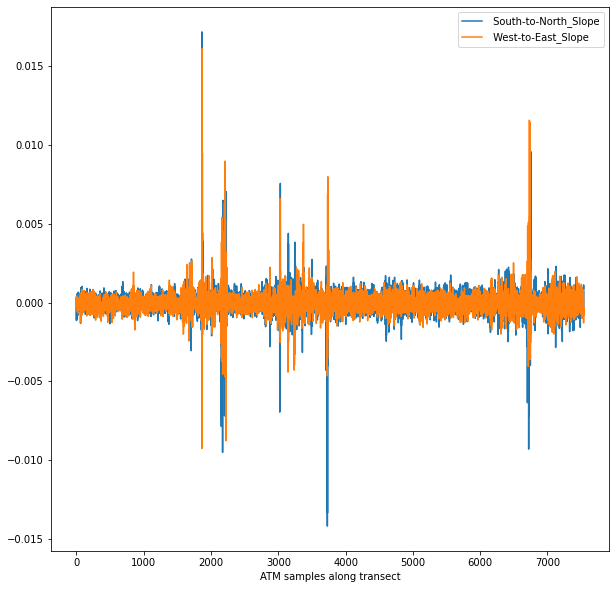

In [6]:
# plot the dataframe columns
atm_df.plot(y=[' South-to-North_Slope', ' West-to-East_Slope'], 
            xlabel='ATM samples along transect', 
            ylabel='', 
            figsize=(10,10))


### max and median of slope of SN & WE

showing deviation of sea ice from horizontal plane in ATM data

In [7]:
print('min deviation: %s units' %atm_df[' South-to-North_Slope'].min())
print('max deviation: %s units' %atm_df[' South-to-North_Slope'].max())
print('median deviation: %s units' %atm_df[' South-to-North_Slope'].median())

# units???? + box plot maybe?

min deviation: -0.0142064 units
max deviation: 0.0171952 units
median deviation: 0.0 units


In [8]:
print(atm_df[' West-to-East_Slope'].min())
print(atm_df[' West-to-East_Slope'].max())
print(atm_df[' West-to-East_Slope'].median())

-0.0092668
0.0161247
0.0
